## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

def one(z):
    return z ** 2

def two(z):
    return (z - 1) ** 2

def three(z):
    return (z ** 2) - 1

def four(z):
    return (z ** 2) + 1

def df(z):
    return 2 * z

def df2(z):
    return 2 * (z - 1)

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, me = 0, r1 =0, r2 = 0):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    if me == 1:
                        dz = (one(z + complex(h, h)) - one(z)) / complex(h, h)
                    if me == 2:
                        dz = (two(z + complex(h, h)) - two(z)) / complex(h, h)
                    if me == 3:
                        dz = (three(z + complex(h, h)) - three(z)) / complex(h, h)
                    if me == 4:
                        dz = (four(z + complex(h, h)) - four(z)) / complex(h, h)
                    
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   ####
                    if me == 1:
                        znext = z - 2*one(z) / dz # Newton iteration
                    if me == 2:
                        znext = z - 2*two(z) / dz # Newton iteration
                    if me == 3:
                        znext = z - three(z) / dz # Newton iteration
                    if me == 4:
                        znext = z - four(z) / dz # Newton iteration
                    
                   ####
                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, me = 0, r1 =0, r2 = 0):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, me = me, r1 =r1, r2 = r2)
    if me == 1:
        plt.title('Newton Fractal f(x)=Z^2')
    if me == 2:
        plt.title('Newton Fractal f(x)=(Z-1)^2')
    if me == 3:
        plt.title('Newton Fractal f(x)=Z^2-1')
    if me == 4:
        plt.title('Newton Fractal f(x)=Z^2+1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


# Punto 1

### $f(x)=x^{2}$

Text(0, 0.5, 'f(x)')

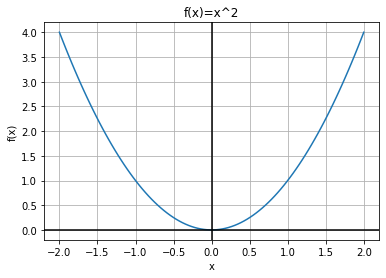

In [3]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,one(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')


### $f(x)=(x-1)^{2}$

Text(0, 0.5, 'f(x)')

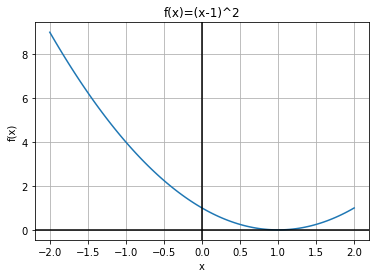

In [7]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,two(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)')


### $f(x)=x^{2}-1$

Text(0, 0.5, 'f(x)')

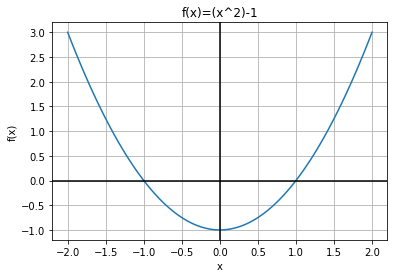

In [8]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,three(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x^2)-1')
plt.xlabel('x')
plt.ylabel('f(x)')


### $f(x)=x^{2}+1$ 

Text(0, 0.5, 'f(x)')

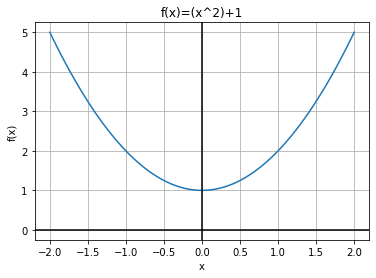

In [9]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,four(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x^2)+1')
plt.xlabel('x')
plt.ylabel('f(x)')


# Punto 2

In [41]:
def Classic(a, b, c):
    print('CLASSIC METHOD:\n')
    det = (b ** 2) - (4 * a * c)
    if det>=0:
        det = sqrt(det)
        x1 = -b + det
        x1 = x1 / (2 * a)
        x2 = -b - det
        x2 = x2 / (2 * a)
        print('     Roots:',x1, x2)
    else:
        print('     No roots')

def PoShenLoh(a, b, c):
    print('\nPHO SHEN LOH METHOD:\n')
    pre_u = ((b ** 2) / 4) - c
    if pre_u>=0:
        u1 = sqrt(pre_u)
        u2 = -1 * u1
        if u1<0:
            u2 = u1
            u1 = -1 * u1
        r = (-b / 2) + u1
        s = (-b / 2) + u2
        print('     Roots:',r, s)
    else:
        print('     No roots')


### $f(x)=x^{2}$

In [37]:
Classic(1, 0, 0)
PoShenLoh(1, 0, 0)

CLASSIC METHOD:

     Roots: 0.0 0.0

PHO SHEN LOH METHOD:

     Roots: 0.0 0.0


### $f(x)=(x-1)^{2}$

In [38]:
Classic(1, -2, 1)
PoShenLoh(1, -2, 1)

CLASSIC METHOD:

     Roots: 1.0 1.0

PHO SHEN LOH METHOD:

     Roots: 1.0 1.0


### $f(x)=x^{2}-1$

In [39]:
Classic(1, 0, -1)
PoShenLoh(1, 0, -1)

CLASSIC METHOD:

     Roots: 1.0 -1.0

PHO SHEN LOH METHOD:

     Roots: 1.0 -1.0


### $f(x)=x^{2}+1$

In [42]:
Classic(1, 0, 1)
PoShenLoh(1, 0, 1)

CLASSIC METHOD:

     No roots

PHO SHEN LOH METHOD:

     No roots


# Punto 3

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


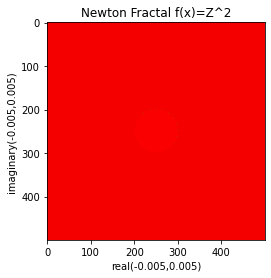

In [4]:
display1(zoom =1/100, me = 1, r1 = 0, r2 = 0)

Z region from ( -0.03333333333333333 , -0.03333333333333333 ) to ( 0.03333333333333333 , 0.03333333333333333 )


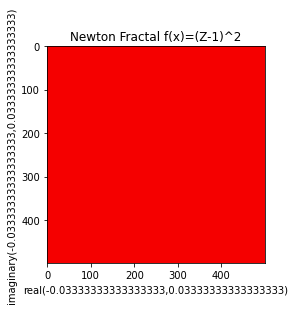

In [2]:
#display1(zoom =1, me = 2, r1 = 1, r2 = 1)
#display1(zoom =1/10, me = 2, r1 = 1, r2 = 1)
display1(zoom =1/15, me = 2, r1 = 1, r2 = 1)

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


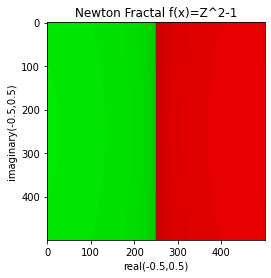

In [23]:
display1(zoom =1, me = 3, r1 = 1, r2 = -1)

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


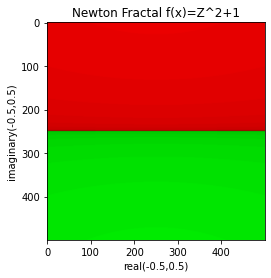

In [24]:
display1(zoom =1, me = 4, r1 = 1j, r2 = -1j)

# Punto 4

In [34]:
def iteration(z, a, me):
    #h = 1e-7
    r=[]
    i=[]
    for k in range(50):
        if me == 1:
            dz = df(z)
            z = z - one(z) / dz # Newton iteration
        if me == 2:
            dz = df2(z)
            z = z - two(z) / dz # Newton iteration
        if me == 3:
            dz = df(z)
            z = z - three(z) / dz # Newton iteration
        if me == 4:
            dz = df(z)
            z = z - four(z) / dz # Newton iteration
        r.append(np.real(z))
        i.append(np.imag(z))
    plt.title(a)
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

## $f(z)=z^{2}$

Newton Iterates Form Z=10.0 + 0.0J



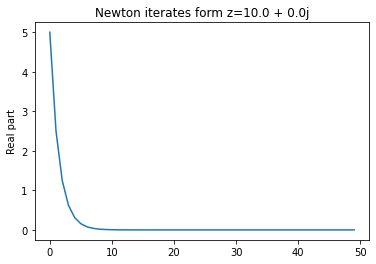

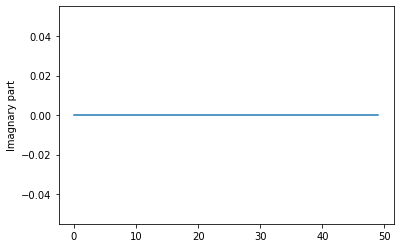

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-10.0 + 0.0J



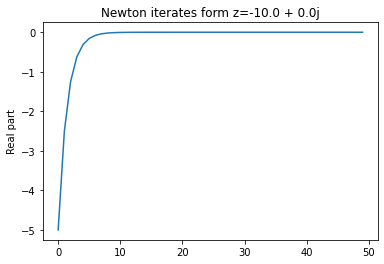

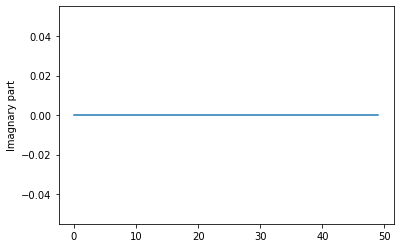

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-0.0 + 10.0J



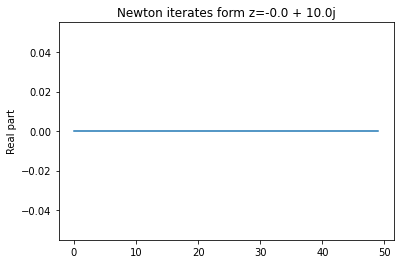

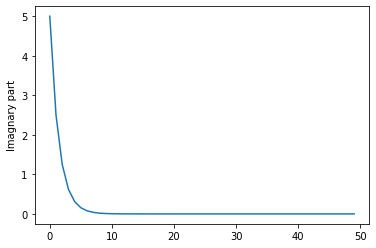

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-0.0 - 10.0J



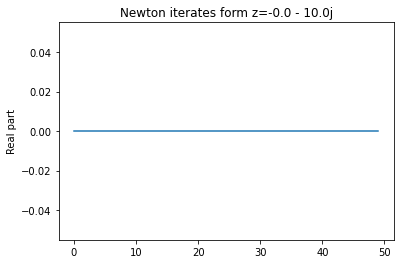

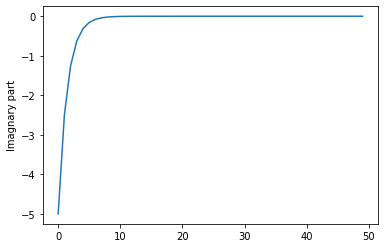

--------------------------------------------------------------
--------------------------------------------------------------


In [46]:
print("Newton iterates form z=10.0 + 0.0j\n".title())
iteration(z=10.0 + 0.0j,a='Newton iterates form z=10.0 + 0.0j',me = 1)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-10.0 + 0.0j\n".title())
iteration(z=-10.0 + 0.0j,a='Newton iterates form z=-10.0 + 0.0j',me = 1)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-0.0 + 10.0j\n".title())
iteration(z=-0.0 + 10.0j,a='Newton iterates form z=-0.0 + 10.0j',me = 1)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-0.0 - 10.0j\n".title())
iteration(z=-0.0 - 10.0j,a='Newton iterates form z=-0.0 - 10.0j',me = 1)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")

## $f(z) = (z-1)^{2}$

Newton Iterates Form Z=10.0 + 0.0J



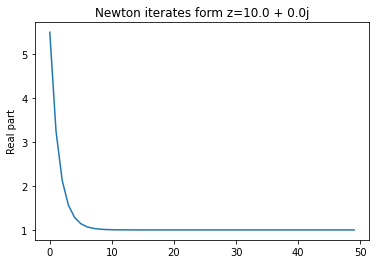

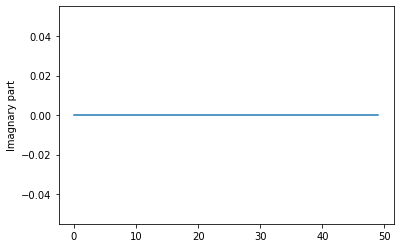

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-10.0 + 0.0J



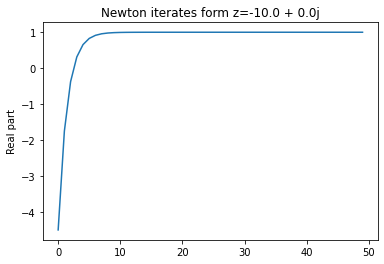

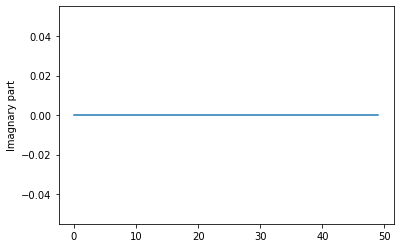

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-0.0 + 10.0J



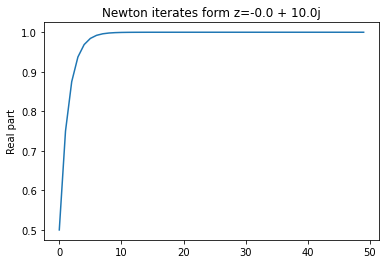

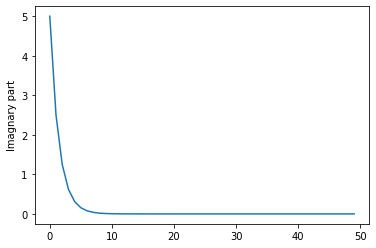

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-0.0 - 10.0J



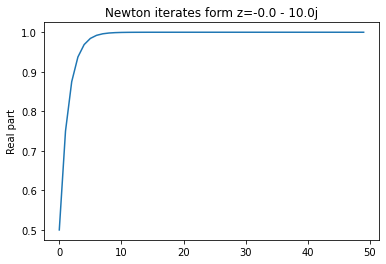

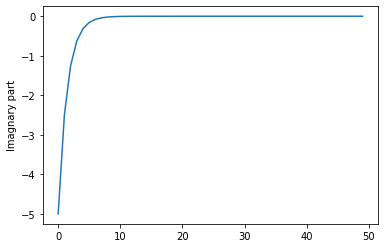

--------------------------------------------------------------
--------------------------------------------------------------


In [47]:
print("Newton iterates form z=10.0 + 0.0j\n".title())
iteration(z=10.0 + 0.0j,a='Newton iterates form z=10.0 + 0.0j',me = 2)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-10.0 + 0.0j\n".title())
iteration(z=-10.0 + 0.0j,a='Newton iterates form z=-10.0 + 0.0j',me = 2)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-0.0 + 10.0j\n".title())
iteration(z=-0.0 + 10.0j,a='Newton iterates form z=-0.0 + 10.0j',me = 2)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-0.0 - 10.0j\n".title())
iteration(z=-0.0 - 10.0j,a='Newton iterates form z=-0.0 - 10.0j',me = 2)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")

## $f(z) = z^{2}-1$

Newton Iterates Form Z=10.0 + 0.0J



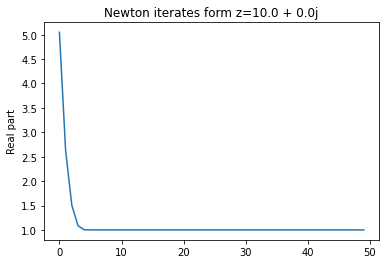

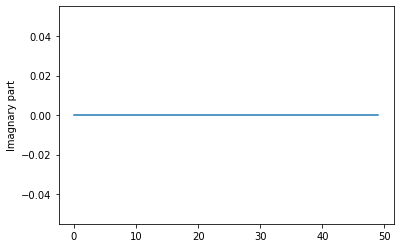

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-10.0 + 0.0J



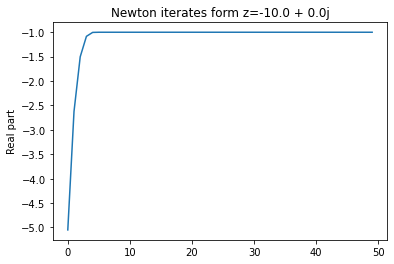

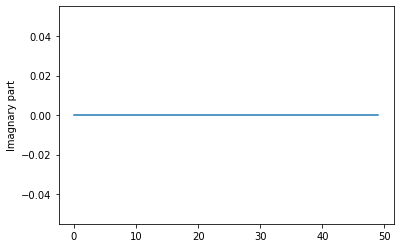

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-0.0 + 10.0J



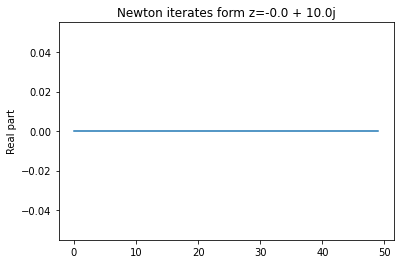

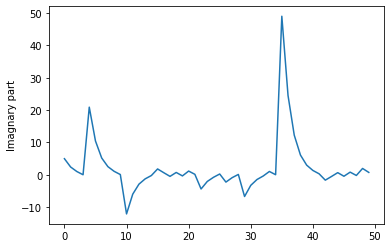

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-0.0 - 10.0J



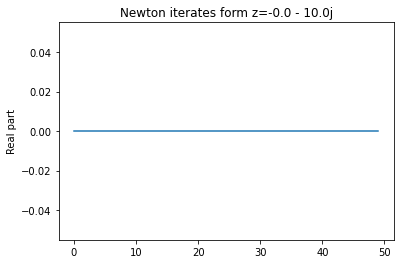

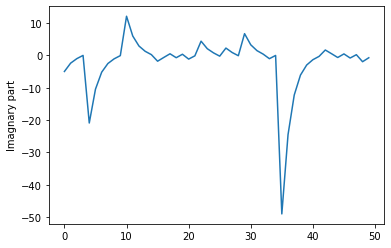

--------------------------------------------------------------
--------------------------------------------------------------


In [48]:
print("Newton iterates form z=10.0 + 0.0j\n".title())
iteration(z=10.0 + 0.0j,a='Newton iterates form z=10.0 + 0.0j',me = 3)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-10.0 + 0.0j\n".title())
iteration(z=-10.0 + 0.0j,a='Newton iterates form z=-10.0 + 0.0j',me = 3)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-0.0 + 10.0j\n".title())
iteration(z=-0.0 + 10.0j,a='Newton iterates form z=-0.0 + 10.0j',me = 3)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-0.0 - 10.0j\n".title())
iteration(z=-0.0 - 10.0j,a='Newton iterates form z=-0.0 - 10.0j',me = 3)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")

Newton Iterates Form Z=10.0 + 0.0J



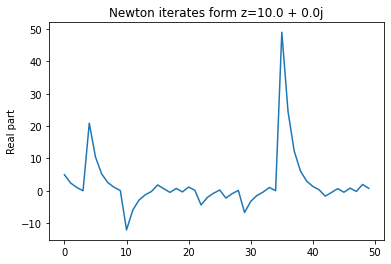

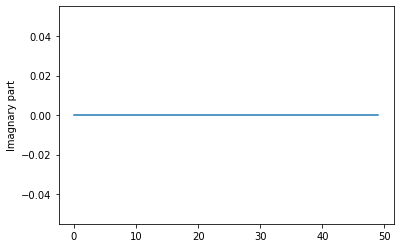

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-10.0 + 0.0J



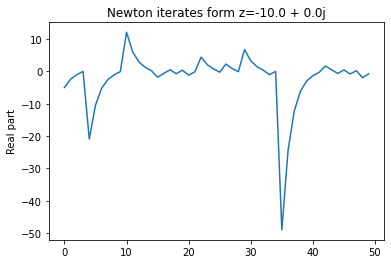

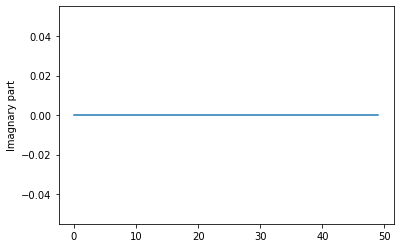

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-0.0 + 10.0J



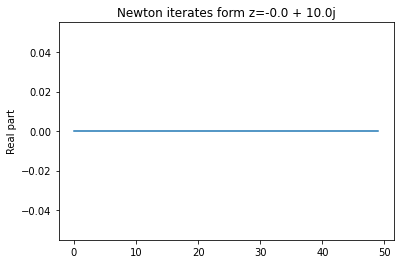

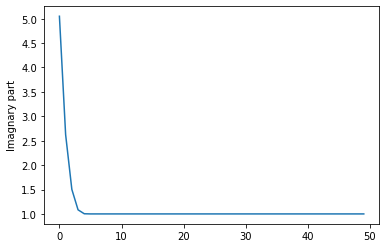

--------------------------------------------------------------
--------------------------------------------------------------
Newton Iterates Form Z=-0.0 - 10.0J



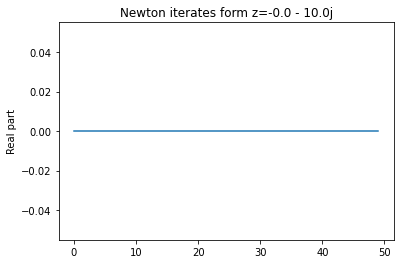

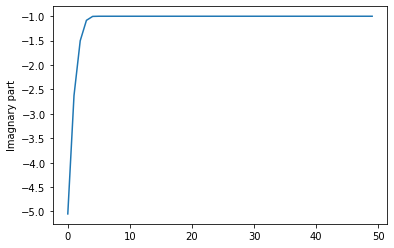

--------------------------------------------------------------
--------------------------------------------------------------


In [49]:
print("Newton iterates form z=10.0 + 0.0j\n".title())
iteration(z=10.0 + 0.0j,a='Newton iterates form z=10.0 + 0.0j',me = 4)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-10.0 + 0.0j\n".title())
iteration(z=-10.0 + 0.0j,a='Newton iterates form z=-10.0 + 0.0j',me = 4)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-0.0 + 10.0j\n".title())
iteration(z=-0.0 + 10.0j,a='Newton iterates form z=-0.0 + 10.0j',me = 4)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Newton iterates form z=-0.0 - 10.0j\n".title())
iteration(z=-0.0 - 10.0j,a='Newton iterates form z=-0.0 - 10.0j',me = 4)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")

# Punto 5

## $f(z) = z^{2}$

In [2]:
print("Newton iterates form z=0.0 + 0.0j\n".title())
iteration(z=0.0 + 0.0j,a='Newton iterates form z=00.0 + 0.0j',me = 1)

Newton Iterates Form Z=0.0 + 0.0J



NameError: name 'iteration' is not defined

## $f(z) = (z-1)^{2}$

In [3]:
print("Newton iterates form z=0.0 + 0.0j\n".title())
iteration(z=0.0 + 0.0j,a='Newton iterates form z=00.0 + 0.0j',me = 2)

Newton Iterates Form Z=0.0 + 0.0J



NameError: name 'iteration' is not defined

## $f(z) = z^{2}-1$

In [4]:
print("Newton iterates form z=0.0 + 0.0j\n".title())
iteration(z=0.0 + 0.0j,a='Newton iterates form z=00.0 + 0.0j',me = 3)

Newton Iterates Form Z=0.0 + 0.0J



NameError: name 'iteration' is not defined

## $f(z) = z^{2}+1$

In [5]:
print("Newton iterates form z=0.0 + 0.0j\n".title())
iteration(z=0.0 + 0.0j,a='Newton iterates form z=00.0 + 0.0j',me = 4)

Newton Iterates Form Z=0.0 + 0.0J



NameError: name 'iteration' is not defined